# Machine Learning for Classification

## Churn Prediction Project

- Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn
- Dataset: https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
%matplotlib inline

## Data Preparation
- Download the data, read it with pandas
- Look at the data columns and data types
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation


In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [5]:
# Check for missing data
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [6]:
# Check for data types
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
# Transform totalcharges to numeric
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges.isnull().sum()

np.int64(11)

In [8]:
# Replace missing totalcharges with 0
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

np.int64(0)

In [9]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [10]:
# Transform yes/no to 1/0
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## Validation Framework

- Perform the train/validation/test split with Scikit-Learn

In [11]:
# Split the data into train and test sets using scikit-learn
df_fulltrain, df_test = train_test_split(df, test_size=0.2, random_state=1)
print(df_fulltrain.shape, df_test.shape)

(5634, 21) (1409, 21)


In [12]:
df_train, df_validation = train_test_split(df_fulltrain, test_size=0.25, random_state=1)
print(df_train.shape, df_validation.shape)

(4225, 21) (1409, 21)


In [13]:
df_fulltrain = df_fulltrain.reset_index(drop=True)
df_train = df_train.head().reset_index(drop=True)
df_validation = df_validation.head().reset_index(drop=True)
df_test = df_test.head().reset_index(drop=True)
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [14]:
# Get the target variable
y_train = df_train.churn.values
y_validation = df_validation.churn.values
y_test = df_test.churn.values

In [15]:
# Drop the target variable from the dataframe
del df_train['churn']
del df_validation['churn']
del df_test['churn']

In [16]:
print(df_train.shape, df_validation.shape, df_test.shape)
print(y_train.shape, y_validation.shape, y_test.shape)

(5, 20) (5, 20) (5, 20)
(5,) (5,) (5,)


## EDA
- Check for class imbalance on the churn rate
- Analyze the numerical and categorical values

In [17]:
df_train.reset_index(drop=True).head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [18]:
# Check for class imbalance in churn rate
df_fulltrain.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [19]:
global_churn_rate = df_fulltrain.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [20]:
# Identify numerical columns
list(df_fulltrain.dtypes[df_fulltrain.dtypes != 'object'].index)

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

In [21]:
numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']

In [22]:
# Identify categorical columns
list(df_fulltrain.dtypes[df_fulltrain.dtypes == 'object'].index)
# df_fulltrain.columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [23]:
categorical_columns = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod']

df_fulltrain[categorical_columns].head().T

,0,1,2,3,4
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes
onlinebackup,no_internet_service,yes,yes,no,yes
deviceprotection,no_internet_service,yes,no,yes,no


In [24]:
for col in categorical_columns:
    print(f'{col}: {df[col].unique()[:10]}')
    print('unique values:', df[col].nunique())
    print('---')

gender: ['female' 'male']
unique values: 2
---
seniorcitizen: [0 1]
unique values: 2
---
partner: ['yes' 'no']
unique values: 2
---
dependents: ['no' 'yes']
unique values: 2
---
phoneservice: ['no' 'yes']
unique values: 2
---
multiplelines: ['no_phone_service' 'no' 'yes']
unique values: 3
---
internetservice: ['dsl' 'fiber_optic' 'no']
unique values: 3
---
onlinesecurity: ['no' 'yes' 'no_internet_service']
unique values: 3
---
onlinebackup: ['yes' 'no' 'no_internet_service']
unique values: 3
---
deviceprotection: ['no' 'yes' 'no_internet_service']
unique values: 3
---
techsupport: ['no' 'yes' 'no_internet_service']
unique values: 3
---
streamingtv: ['no' 'yes' 'no_internet_service']
unique values: 3
---
streamingmovies: ['no' 'yes' 'no_internet_service']
unique values: 3
---
contract: ['month-to-month' 'one_year' 'two_year']
unique values: 3
---
paperlessbilling: ['yes' 'no']
unique values: 2
---
paymentmethod: ['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_car

### Feature Selection: churn rate and risk ratio

Identifying which features affect our target variable

- Churn rate difference = Category Churn - Global Churn
- Risk ratio = Category Churn / Global Churn

If 'Churn rate difference' and 'Risk ratio' > 0, more likely to churn

If 'Churn rate difference' and 'Risk ratio' < 0, less likely to churn

In [25]:
# Churn Rate Difference
churn_female = df_fulltrain[df_fulltrain.gender == 'female'].churn.mean()
churn_male = df_fulltrain[df_fulltrain.gender == 'male'].churn.mean()
print('Churn rate for females:', round(churn_female, 2))
print('Churn rate for males:', round(churn_male, 2))
print('Global churn rate:', round(global_churn_rate, 2))

print('Difference from global churn rate:')
print('For females:', round(churn_female - global_churn_rate, 2))
print('For males:', round(churn_male - global_churn_rate, 2))

Churn rate for females: 0.28
Churn rate for males: 0.26
Global churn rate: 0.27
Difference from global churn rate:
For females: 0.01
For males: -0.01


In [26]:
churn_partner = df_fulltrain[df_fulltrain.partner == 'yes'].churn.mean()
churn_no_partner = df_fulltrain[df_fulltrain.partner == 'no'].churn.mean()
print('Churn rate for customers with partner:', round(churn_partner, 2))
print('Churn rate for customers without partner:', round(churn_no_partner, 2))
print('Global churn rate:', round(global_churn_rate, 2))

print('Difference from global churn rate:')
print('For customers with partner:', round(churn_partner - global_churn_rate, 2))
print('For customers without partner:', round(churn_no_partner - global_churn_rate, 2))

Churn rate for customers with partner: 0.21
Churn rate for customers without partner: 0.33
Global churn rate: 0.27
Difference from global churn rate:
For customers with partner: -0.06
For customers without partner: 0.06


In [27]:
# Risk ratio
print('Risk ratio for females:', round(churn_female / global_churn_rate, 2))
print('Risk ratio for males:', round(churn_male / global_churn_rate, 2))
print('Risk ratio for customers with partner:', round(churn_partner / global_churn_rate, 2))
print('Risk ratio for customers without partner:', round(churn_no_partner / global_churn_rate, 2))

Risk ratio for females: 1.03
Risk ratio for males: 0.97
Risk ratio for customers with partner: 0.76
Risk ratio for customers without partner: 1.22


In [28]:
for category in categorical_columns:
    print("Category:", category)
    df_group = df_fulltrain.groupby(category).churn.agg(['mean', 'count'])
    df_group['difference'] = round(df_group['mean'] - global_churn_rate, 2)
    df_group['risk_ratio'] = round(df_group['mean'] / global_churn_rate, 2)
    display(df_group)

Category: gender


,mean,count,difference,risk_ratio
gender,,,,
female,0.276824,2796,0.01,1.03
male,0.263214,2838,-0.01,0.97


Category: seniorcitizen


,mean,count,difference,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.03,0.90
1,0.413377,912,0.14,1.53


Category: partner


,mean,count,difference,risk_ratio
partner,,,,
no,0.329809,2932,0.06,1.22
yes,0.205033,2702,-0.06,0.76


Category: dependents


,mean,count,difference,risk_ratio
dependents,,,,
no,0.313760,3968,0.04,1.16
yes,0.165666,1666,-0.10,0.61


Category: phoneservice


,mean,count,difference,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.03,0.89
yes,0.273049,5087,0.00,1.01


Category: multiplelines


,mean,count,difference,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.01,0.95
no_phone_service,0.241316,547,-0.03,0.89
yes,0.290742,2387,0.02,1.08


Category: internetservice


,mean,count,difference,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.08,0.71
fiber_optic,0.425171,2479,0.16,1.57
no,0.077805,1221,-0.19,0.29


Category: onlinesecurity


,mean,count,difference,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.15,1.56
no_internet_service,0.077805,1221,-0.19,0.29
yes,0.153226,1612,-0.12,0.57


Category: onlinebackup


,mean,count,difference,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.13,1.50
no_internet_service,0.077805,1221,-0.19,0.29
yes,0.217232,1915,-0.05,0.80


Category: deviceprotection


,mean,count,difference,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.13,1.47
no_internet_service,0.077805,1221,-0.19,0.29
yes,0.230412,1940,-0.04,0.85


Category: techsupport


,mean,count,difference,risk_ratio
techsupport,,,,
no,0.418914,2781,0.15,1.55
no_internet_service,0.077805,1221,-0.19,0.29
yes,0.159926,1632,-0.11,0.59


Category: streamingtv


,mean,count,difference,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.07,1.27
no_internet_service,0.077805,1221,-0.19,0.29
yes,0.302723,2167,0.03,1.12


Category: streamingmovies


,mean,count,difference,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.07,1.26
no_internet_service,0.077805,1221,-0.19,0.29
yes,0.307273,2200,0.04,1.14


Category: contract


,mean,count,difference,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.16,1.60
one_year,0.120573,1186,-0.15,0.45
two_year,0.028274,1344,-0.24,0.10


Category: paperlessbilling


,mean,count,difference,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.10,0.64
yes,0.338151,3321,0.07,1.25


Category: paymentmethod


,mean,count,difference,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.10,0.62
credit_card_(automatic),0.164339,1217,-0.11,0.61
electronic_check,0.455890,1893,0.19,1.69
mailed_check,0.193870,1305,-0.08,0.72


### Feature Selection: Mutual Information

- It tells us how much we can learn about one variable if we knwo the value of another.

[Feature Selection — Mutual Information](https://medium.com/@miramnair/feature-selection-mutual-information-a0def943e1ed)

In [29]:
mutual_info_score(df_fulltrain.churn, df_fulltrain.contract)

0.0983203874041556

In [30]:
mutual_info_score(df_fulltrain.churn, df_fulltrain.gender)

0.0001174846211139946

In [31]:
# Mutual Information for all categorical columns
mi = df_fulltrain[categorical_columns].apply(lambda x: mutual_info_score(df_fulltrain.churn, x))
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Selection: Correlation

- Select subsets of features that are highly correlated with the target variable but have low correlation with each other

[Feature Selection — Correlation](https://medium.com/@sariq16/correlation-based-feature-selection-in-a-data-science-project-3ca08d2af5c6)

In [32]:
df_fulltrain[numerical_columns].head()

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75


In [33]:
# Correlation with target variable
df_fulltrain[numerical_columns].corrwith(df_fulltrain.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Churn rate for customers with tenure within the first quarter: 0.6
Churn rate for customers with tenure within the first year: 0.48
Churn rate for customers with tenure over one year: 0.18


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

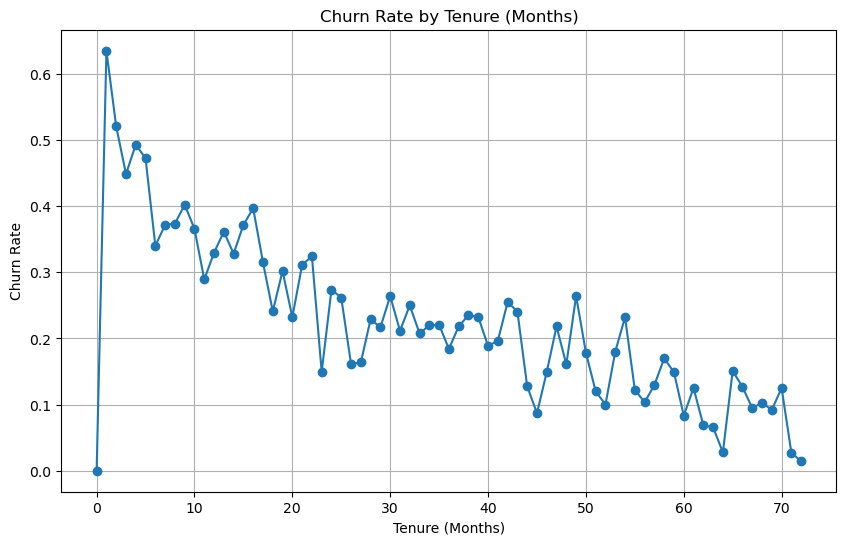

In [45]:
print('Churn rate for customers with tenure within the first quarter:', round(df_fulltrain[df_fulltrain.tenure < 3].churn.mean(), 2))
print('Churn rate for customers with tenure within the first year:', round(df_fulltrain[df_fulltrain.tenure < 12].churn.mean(), 2))
print('Churn rate for customers with tenure over one year:', round(df_fulltrain[df_fulltrain.tenure >= 12].churn.mean(), 2))

# Plot churn rate by tenure
churn_by_tenure = df_fulltrain.groupby('tenure').churn.mean()
plt.figure(figsize=(10, 6))
plt.plot(churn_by_tenure.index, churn_by_tenure.values, marker='o')
plt.title('Churn Rate by Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()

In [41]:
print('Churn rate for customers with monthly charges below $35:', round(df_fulltrain[df_fulltrain.monthlycharges < 35].churn.mean(), 2))
print('Churn rate for customers with monthly charges between $35 and $70:', round(df_fulltrain[(df_fulltrain.monthlycharges >= 35) & (df_fulltrain.monthlycharges < 70)].churn.mean(), 2))
print('Churn rate for customers with monthly charges above $70:', round(df_fulltrain[df_fulltrain.monthlycharges >= 70].churn.mean(), 2))

Churn rate for customers with monthly charges below $35: 0.11
Churn rate for customers with monthly charges between $35 and $70: 0.24
Churn rate for customers with monthly charges above $70: 0.36
